# Exercici 1

- **Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.**

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
df= pd.read_csv('housing data.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
with open('housing data description.txt', encoding='utf8') as f:
    for line in f:
        print(line.strip())

1. Title: Boston Housing Data

2. Sources:
(a) Origin:  This dataset was taken from the StatLib library which is
maintained at Carnegie Mellon University.
(b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the
demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.
(c) Date: July 7, 1993

3. Past Usage:
-   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley,
1980.   N.B. Various transformations are used in the table on
pages 244-261.
-  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
In Proceedings on the Tenth International Conference of Machine
Learning, 236-243, University of Massachusetts, Amherst. Morgan
Kaufmann.

4. Relevant Information:

Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class"
attribute "MEDV"), 1 binary-valued attribute.

7. Attribute Information:

1. CRIM      per capita crime rate by town
2. ZN 

In [4]:
df.columns=['CRIM','ZN','INDUS',' CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df.columns

Index(['CRIM', 'ZN', 'INDUS', ' CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
 CHAS      0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

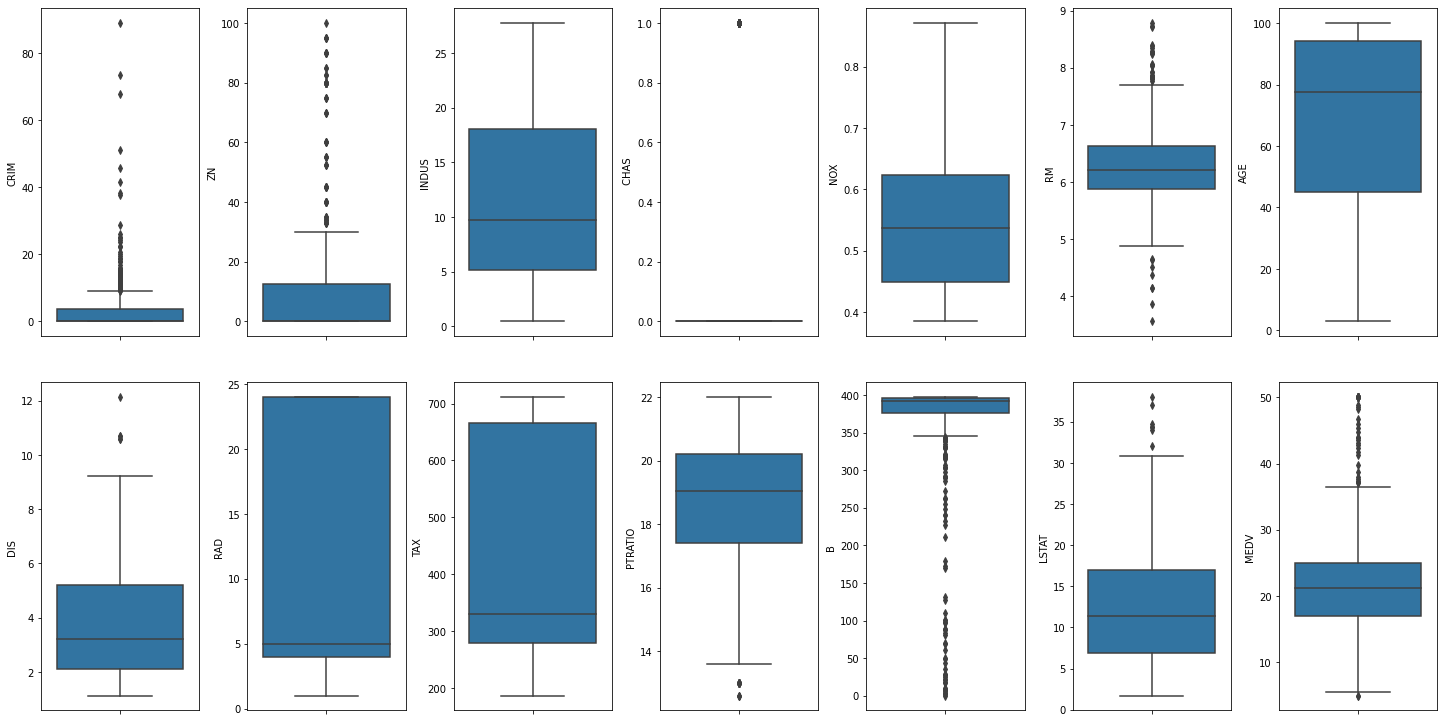

In [8]:
#checking outliers using boxplot
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
count = 0
axs = axs.flatten()
for tar,var in df.items():
    sns.boxplot(y=tar, data=df, ax=axs[count])
    count= count+1
plt.tight_layout(pad=0.5, w_pad=0.78, h_pad=4.0)

In [9]:
corr=df.corr()
corr


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


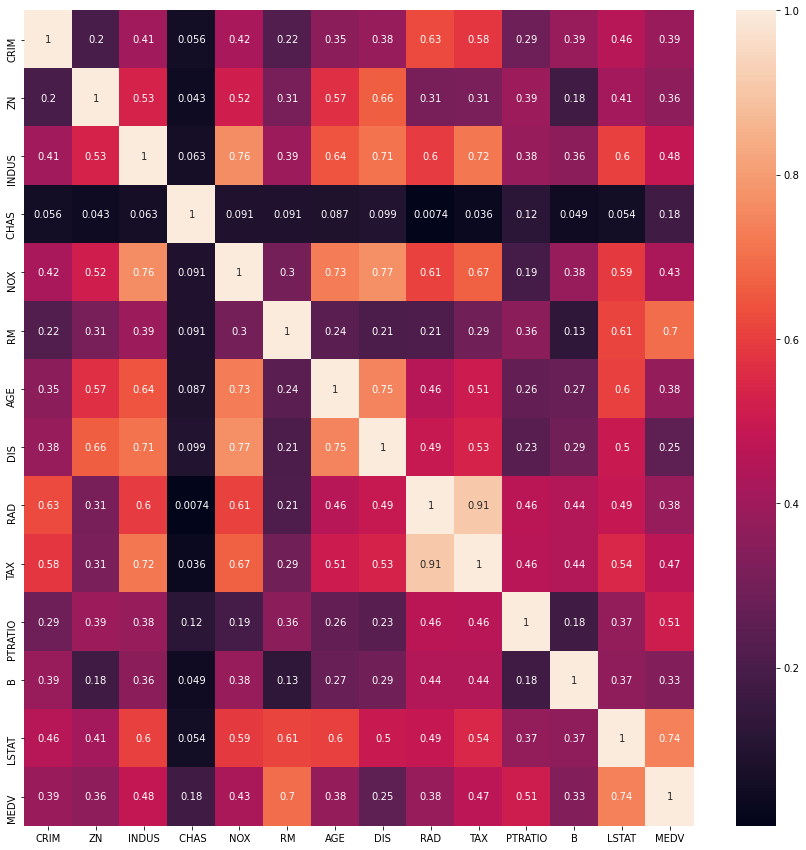

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(corr.abs(), annot=True);

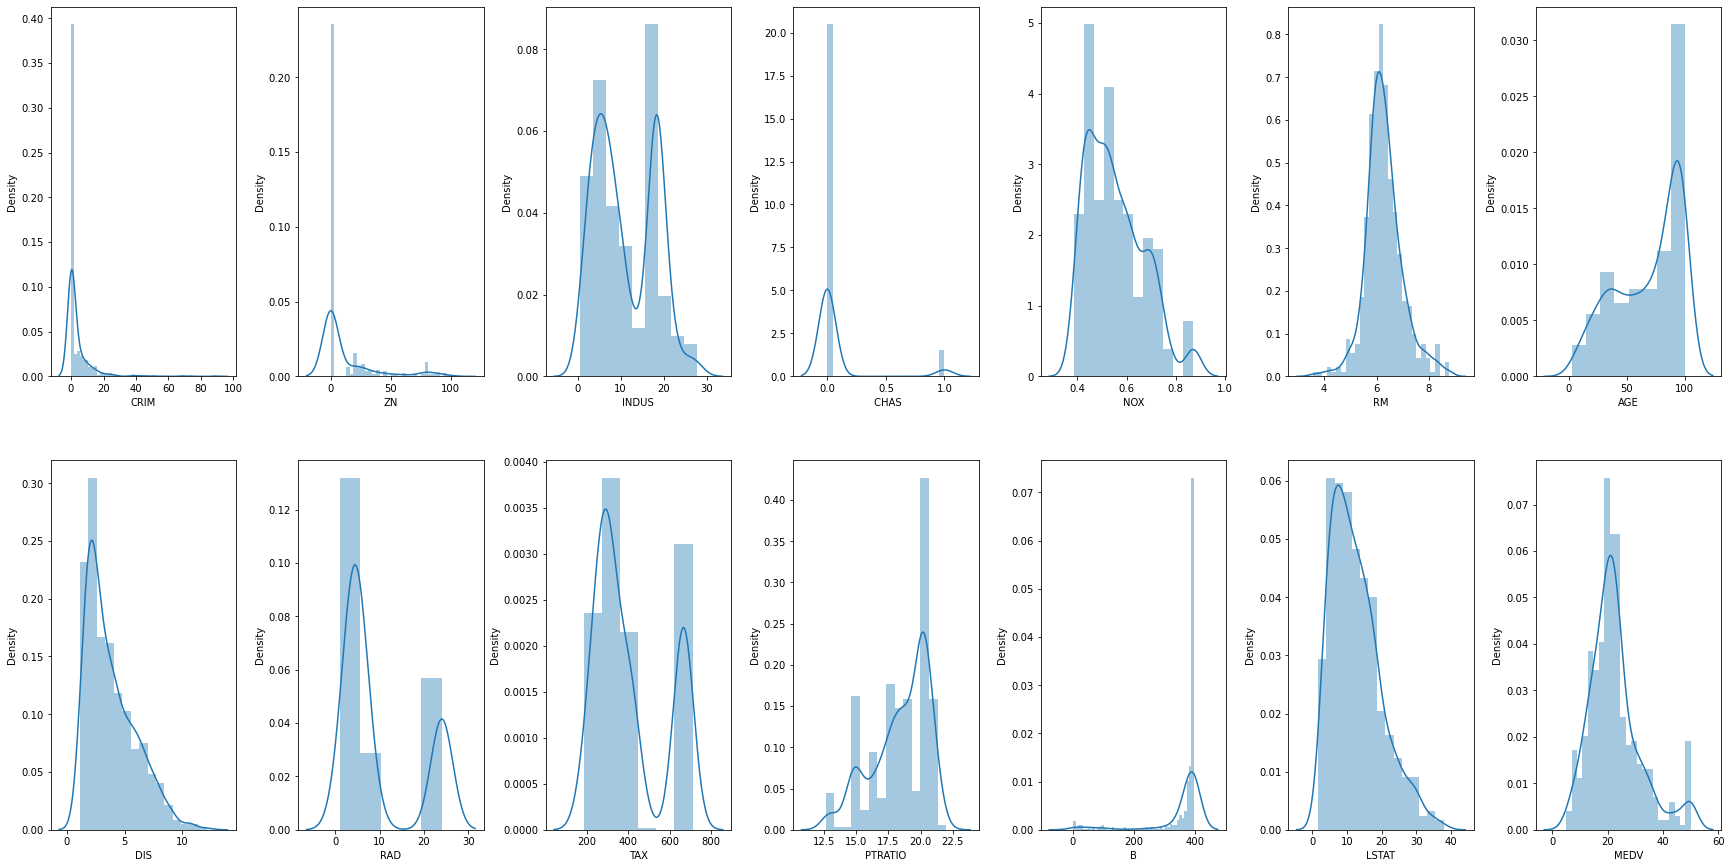

In [11]:


#Checking the skewness in data
fig,axs = plt.subplots(ncols=7, nrows=2, figsize=(24,12))
count = 0
axs = axs.flatten()
for tar,var in df.items():
    sns.distplot(var,ax=axs[count])
    count = count+1
plt.tight_layout(pad=0.5, w_pad=0.6, h_pad=5.0)



In [12]:
X = df.drop(['MEDV'], axis = 1)
y = df['MEDV']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [15]:
from sklearn import preprocessing
#MinMaxScaler per la normalizació
normColumns = ['INDUS','NOX','AGE', 'TAX','RAD']
scalerNorm = preprocessing.MinMaxScaler().fit(X_test[normColumns])
X_train[normColumns] = scalerNorm.transform(X_train[normColumns])

#RobustScaler per les variables amb outliers
robColumns = ['CRIM', 'ZN', 'RM', 'DIS', 'PTRATIO','B', 'LSTAT']
robustScaler = preprocessing.RobustScaler().fit(X_test[robColumns])
X_train[robColumns] = robustScaler.transform(X_train[robColumns])

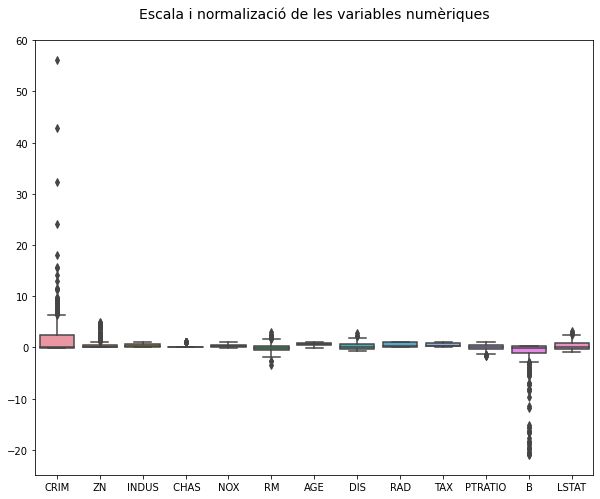

In [16]:
#plot it
plt.figure(figsize=(10, 8))
sns.boxplot(data=X_train)
plt.title('Escala i normalizació de les variables numèriques\n', size = 14)
plt.show()


In [17]:

#MinMaxScaler per la normalizació

X_test[normColumns] = scalerNorm.transform(X_test[normColumns])

#RobustScaler per les variables amb outliers

X_test[robColumns] = robustScaler.transform(X_test[robColumns])


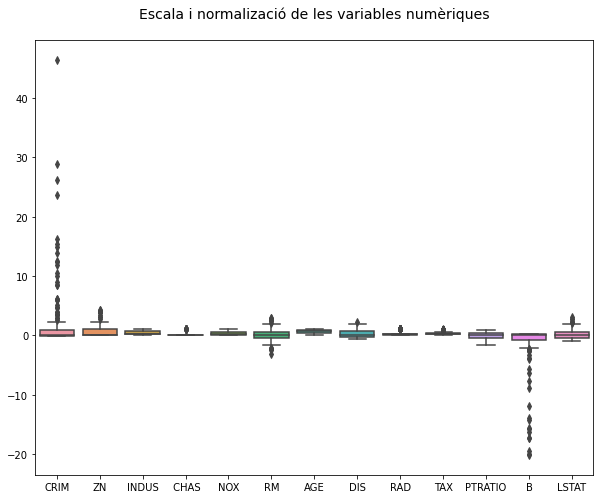

In [18]:
#plot it
plt.figure(figsize=(10, 8))
sns.boxplot(data=X_test)
plt.title('Escala i normalizació de les variables numèriques\n', size = 14)
plt.show()


 **1. LINEAR REGRESSION**


In [19]:

from sklearn.linear_model import LinearRegression
lr = LinearRegression()




**Train the model using the training sets** 

In [20]:
lr.fit(X_train, y_train)


LinearRegression()

In [21]:


# Value of y intercept
lr.intercept_



26.88171598312273

In [22]:
#predicting on training data
y_pred=lr.predict(X_train)
#Model Evaluation and error calculations
print('R^2 =',metrics.r2_score(y_train, y_pred))
print('MSE =',metrics.mean_squared_error(y_train, y_pred))


R^2 = 0.7495400632086622
MSE = 19.459680134802593


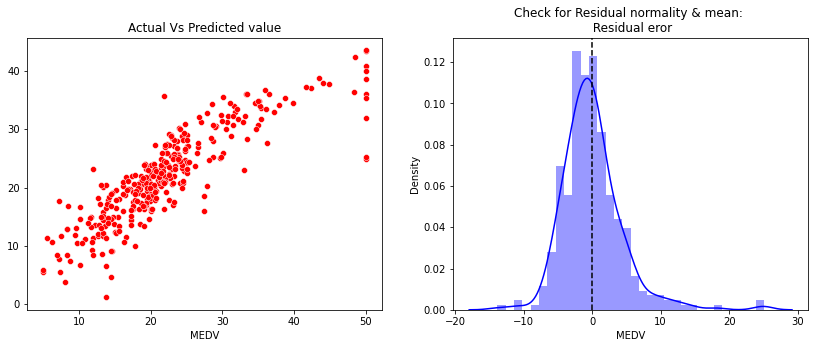

In [23]:


#Plotting Actual observations vs predicted observations
import matplotlib.pyplot as plt 
import seaborn as sns
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_train,y_pred,ax=ax,color='r')
ax.set_title('Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
a=(y_train - y_pred)
sns.distplot(a,ax=ax,color='b')
ax.axvline(a.mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');



In [24]:
R_square = lr.score(X_test,y_test)
VIF_LR = 1/(1- R_square)
VIF_LR

3.3291782669296457

El MEDV vs previst és de naturalesa lineal.\
    Els residus es distribueixen normalment i segueix els supòsits de normalitat.\
    VIF <5, es moderadament correlacionat.

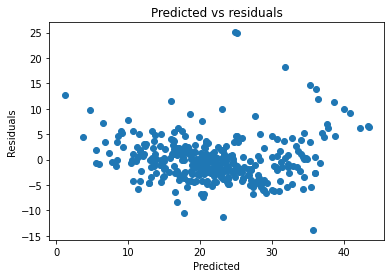

In [25]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

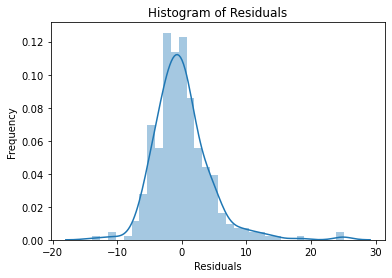

In [26]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


Aquí els residus es distribueixen normalment. Per tant, es compleix el supòsit de normalitat

**For test data**

In [27]:
# Predicting Test data with the model
y_test_predlr = lr.predict(X_test)

In [28]:
# Model Evaluation
r2_lr = metrics.r2_score(y_test, y_test_predlr)
MSE_lr = metrics.mean_squared_error(y_test, y_test_predlr)
print('R^2:', r2_lr)
print('MSE:',MSE_lr)


R^2: 0.6996255772983115
MSE: 29.32659652612324


Aquí les puntuacions de les avaluacions del model gairebé coincideixen amb les de les dades del train. Per tant, el model no està overfitting.


**2. RANDOM FOREST REGRESSOR**


In [29]:
#importing the dataset
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)


RandomForestRegressor()

In [30]:
#Predicting the model
y_predrf=rfr.predict(X_train)


In [31]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_predrf))
print('MSE:',metrics.mean_squared_error(y_train, y_predrf))

R^2: 0.9784292823165083
MSE: 1.6759537344632764


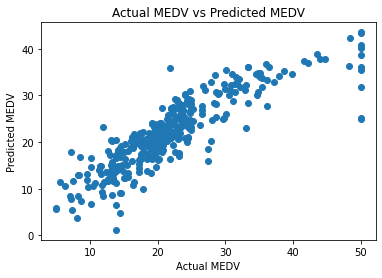

In [32]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual MEDV vs Predicted MEDV")
plt.show()


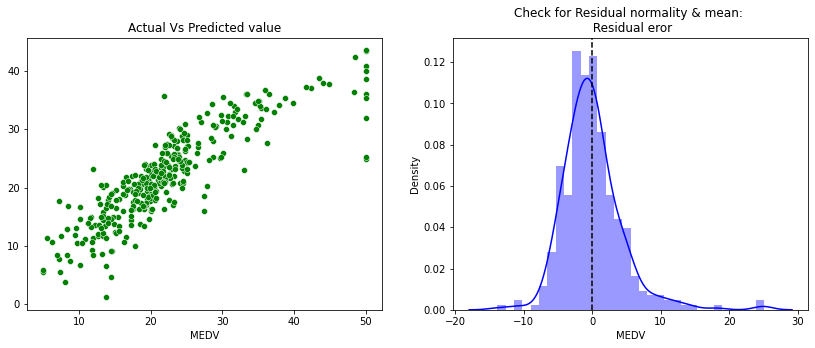

In [33]:
#Plotting Actual observations vs predicted observations
import matplotlib.pyplot as plt 
import seaborn as sns
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_train,y_pred,ax=ax,color='g')
ax.set_title('Actual Vs Predicted value')
# Check for Residual normality & mean
ax = f.add_subplot(122)
a=(y_train - y_pred)
sns.distplot(a,ax=ax,color='b')
ax.axvline(a.mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

- Podem analitzar la distribució dels residus. En particular, ens interessa el sesg i la mitjana.

- En un cas ideal, el que volem és quelcom proper a una distribució normal. Una distribució normal té una sessió de 0 i una mitjana de 0. Una sessió de 0 significa que la distribució és simètrica: la corba de campana no està desviada ni esbiaixada cap a un costat.

In [34]:
#Check for Multicollinearity using Variance Inflation Factor
R_square=rfr.score(X_test,y_test)
VIF_RFR = 1/(1-R_square)
VIF_RFR

7.963377112114271

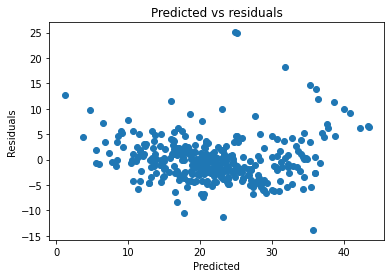

In [35]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()




**For test data**

In [36]:

# Predicting Test data with the model
y_test_predrf = rfr.predict(X_test)


In [37]:

# Model Evaluation
r2_rf = metrics.r2_score(y_test, y_test_predrf)
MSE_rf = metrics.mean_squared_error(y_test, y_test_predrf)
print('R^2:', r2_rf)
print('MSE:', MSE_rf)

R^2: 0.8744251357280629
MSE: 12.26030946710526



# Exercici 2

- **Compara’ls en base al MSE i al R2.**

In [38]:


models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'R-squared Score': [r2_lr,r2_rf], 
    'MSE':[MSE_lr,MSE_rf]})

models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score,MSE
1,Random Forest,0.874425,12.260309
0,Linear Regression,0.699626,29.326597


**R quadrat** és una mesura de què tan bé un model de regressió lineal «s'ajusta» a un conjunt de dades.També anomenat comunament coeficient de determinació , R-quadrat és la proporció de la variància en la variable de resposta que es pot explicar per la variable predictora.

El valor de R-quadrat pot variar de 0 a 1. Un valor de 0 indica que la variable de resposta no es pot explicar en absolut per la variable de predicció. Un valor de 1 indica que la variable de resposta es pot explicar perfectament sense errors mitjançant la variable predictora.



**MSE** bàsicament mesura l'error quadrat mitjana de les nostres prediccions. Per a cada punt, calcula la diferència quadrada entre les prediccions i l'objectiu i després fa mitjana aquests valors.\
Com més gran sigui aquest valor, pitjor és el model. Mai no és negatiu, ja que estem quadrant els errors de predicció individuals abans de sumar-los, però seria zero per a un model perfecte.



- **Conclusió:**

Com ho podem veure

- El model de menys rendiment és la regressió lineal, ja que allà podem concloure que el conjunt de dades no  és lineal.\
- El més fiable es el Random Forest, un algorisme d'aprenentatge automàtic flexible i fàcil d'utilitzar que produeix, fins i tot sense ajustar hiper-paràmetres, un gran resultat la majoria del temps.\
- També és un dels algorismes més utilitzats, per la seva senzillesa i diversitat.\
- Un dels majors avantatges de Random Forest és la seva versatilitat. Es pot utilitzar tant per a tasques de regressió com de classificació.\
- També és fàcil veure la importància relativa que assigna a les característiques d'entrada.\
- Random Forest també és un algorisme molt útil perquè els hiperparàmetres predeterminats que utilitza sovint produeixen un bon resultat de predicció.

# Exercici 3

- **Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.**

**1. LINEAR REGRESSION**


In [39]:


#parametros de linear Regression
lr.get_params().keys()



dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'positive'])

In [40]:
from pprint import pprint

#Parámetros actualmente en uso
print('Parámetros actualmente en uso:\n')
pprint(lr.get_params())

Parámetros actualmente en uso:

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


In [41]:


#Parameter search
from sklearn.model_selection import GridSearchCV

# Llista de diccionarios, amb noms de parametres (str)
param_grid = dict()
param_grid['copy_X'] = [True, False]
param_grid['fit_intercept'] = [True, False]
param_grid['positive'] = [True, False]

search = GridSearchCV(lr, param_grid)

result = search.fit(X_train, y_train)

print('Millors Hyperparametres:', result.best_params_)



Millors Hyperparametres: {'copy_X': True, 'fit_intercept': True, 'positive': False}


In [42]:

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lr_bp = LinearRegression(copy_X= True, fit_intercept= True, positive= False)
lr_bp.fit(X_train,y_train)

# make predictions
lr_bp_pred = lr_bp.predict(X_test)

# evaluate predictions
r2_lr_bp = r2_score(y_test, lr_bp_pred)
mse_lr_bp = mean_squared_error(y_test, lr_bp_pred)


print('R2: %.3f' % r2_lr_bp)
print('MSE: %.3f' % mse_lr_bp)



R2: 0.700
MSE: 29.327


In [43]:
metrics_lr = pd.DataFrame( data = [('Linear Regression',r2_lr,MSE_lr), 
                                  ('Linear Regression best params', r2_lr_bp, mse_lr_bp),],
                         columns = ['Model', 'R2', 'MSE'])


In [44]:
metrics_lr

,Model,R2,MSE
0,Linear Regression,0.699626,29.326597
1,Linear Regression best params,0.699626,29.326597


El model Linear Regression no té gaires paràmetres que es puguin ajustar. Aleshores, conservarem les preferències inicials.

**2. RANDOM FOREST REGRESSOR**


In [47]:


#parametros de randon forest
rfr.get_params().keys()



dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [48]:


rf = RandomForestRegressor(random_state = 42)

from pprint import pprint

# Look at parameters used by our current forest
print('Parámetros actualmente en uso:\n')
pprint(rf.get_params())



Parámetros actualmente en uso:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [49]:


from sklearn.model_selection import RandomizedSearchCV
import warnings 
warnings.filterwarnings('ignore')

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]


random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}

rf = RandomForestRegressor(random_state = 42)

rf_random = RandomizedSearchCV(estimator = rf,
                                param_distributions = random_grid,
                                n_iter = 100, 
                                cv = 5, 
                                scoring='neg_mean_absolute_error', 
                                verbose=2, 
                                random_state=42, 
                                n_jobs = -1)


rf_random.fit(X,y.values.ravel())

rf_random.best_params_



Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [50]:
rf_bp = RandomForestRegressor(n_estimators=800,random_state = 42, min_samples_split=2, min_samples_leaf=1, 
                              max_features='auto', max_depth=100, bootstrap= True).fit(X_train, y_train)
y_pred_rf_bp = rf_bp.predict(X_test)

r2_rf_bp = r2_score(y_test, y_pred_rf_bp)
mse_rf_bp = mean_squared_error(y_test, y_pred_rf_bp)

print('R2 Random Forest Best Parameters= %.3f' % r2_rf_bp, '\nMSE Random Forest Best Parameters= %.3f' % mse_rf_bp)


R2 Random Forest Best Parameters= 0.878 
MSE Random Forest Best Parameters= 11.907


In [51]:


metrics_rf = pd.DataFrame( data = [('Random Forest',r2_rf,MSE_rf ), 
                                  ('Random Forest best params',r2_rf_bp  , mse_rf_bp)],
                         columns = ['Model', 'R2', 'MSE'])




In [52]:
metrics_rf

,Model,R2,MSE
0,Random Forest,0.874425,12.260309
1,Random Forest best params,0.878041,11.907272


- Veiem que el Random Forest amb millors paràmetres, ens dóna un resultat una mica millor que el Random Forest però no és gaire significativa la diferència.

# Exercici 4

- **Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).**

In [53]:


cv_lr = cross_val_score(lr, X_train, y_train, cv=7, scoring='r2')
cv_rf = cross_val_score(rfr, X_train, y_train, cv=7, scoring='r2')
cv_rf_bp = cross_val_score(rf_bp, X_train, y_train, cv=7, scoring='r2')


- La funció cross_val_score() s'utilitzarà per realitzar l'avaluació, agafant el conjunt de dades i la configuració de validació creuada i retornant una llista de puntuacions calculades per a cada plec.\
- Desprès fem una mitjana de aquestas per poder comparar més facilment:

In [54]:
metrics = pd.DataFrame( data = [('Linear Regression',r2_lr ,MSE_lr,cv_lr.mean() ), 
                                ('Random Forest',r2_rf,MSE_rf,cv_rf.mean() ), 
                                ('Random Forest best params', r2_rf_bp,mse_rf_bp ,cv_rf_bp.mean())],
                         columns = ['Model', 'R2', 'MSE','R2 con Cv'])
                    
metrics.head()

,Model,R2,MSE,R2 con Cv
0,Linear Regression,0.699626,29.326597,0.713830
1,Random Forest,0.874425,12.260309,0.837359
2,Random Forest best params,0.878041,11.907272,0.839083



# Exercici 5

- **No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.**

In [55]:
# Fem una còpia del dataframe

df2 = df.copy()

# Definim nous objectius i funcions sense RM

X1 = df2.drop(columns = ['MEDV','RM'])
y1 =df2['MEDV']



In [56]:

#Dividim nous objectius i funcions sense RM

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=4, train_size = 0.80)

print(X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape)



(404, 12) (102, 12) (404,) (102,)


In [57]:

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lr1 = LinearRegression().fit(X1_train, y1_train)
pred_lr1 = lr1.predict(X1_test)
r2_lr1 = r2_score(y1_test, pred_lr1)
mse_lr1 = mean_squared_error(y1_test, pred_lr1)

rf1 = RandomForestRegressor().fit(X1_train, y1_train)
pred_rf1 = rf1.predict(X1_test)
r2_rf1 = r2_score(y1_test, pred_rf1)
mse_rf1 = mean_squared_error(y1_test, pred_rf1)


print('El R2 del model Linear Regression sensa la variable RM es: %.3f' % r2_lr1,
      '\nEl R2 del model Random Forest sensa la variable RM es: %.3f' % r2_rf1,
      '\nEl MSE del model Linear Regression sensa la variable RM es: %.3f' % mse_lr1,
      '\nEl MSE del model Random Forest sensa la variable RM es:%.3f' % mse_rf1)



El R2 del model Linear Regression sensa la variable RM es: 0.695 
El R2 del model Random Forest sensa la variable RM es: 0.842 
El MSE del model Linear Regression sensa la variable RM es: 28.362 
El MSE del model Random Forest sensa la variable RM es:14.672


In [58]:


#Paràmetres de Linear Regression
lr1.get_params().keys()



dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'positive'])

In [59]:


#Paràmetres actualment en ús
print('Parámetros actualmente en uso:\n')
pprint(lr1.get_params())



Parámetros actualmente en uso:

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


In [60]:


# Llista de diccionaris, amb noms de paràmetres (str)
param_grid1 = dict()
param_grid1['copy_X'] = [True, False]
param_grid1['fit_intercept'] = [True, False]
param_grid1['positive'] = [True, False]

search1 = GridSearchCV(lr1, param_grid1)

result1 = search1.fit(X1_train, y1_train)

print('Millors Hyperparametres:', result1.best_params_)



Millors Hyperparametres: {'copy_X': True, 'fit_intercept': True, 'positive': False}


In [61]:


lr1_bp = LinearRegression(copy_X= True, fit_intercept= True, positive= False)
lr1_bp.fit(X1_train,y1_train)

# Make predictions
lr1_bp_pred = lr1_bp.predict(X1_test)

# Evaluate predictions
r2_lr1_bp = r2_score(y1_test, lr1_bp_pred)
mse_lr1_bp = mean_squared_error(y1_test, lr1_bp_pred)


print('R2: %.3f' % r2_lr1_bp)
print('MSE: %.3f' % mse_lr1_bp)



R2: 0.695
MSE: 28.362


In [62]:
#Paràmetres de Randon Forest
rf1.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [63]:
rf1 = RandomForestRegressor(random_state = 42)


# Look at parameters used by our current forest
print('Paràmetres actualment en ús:\n')
pprint(rf1.get_params())


Paràmetres actualment en ús:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [64]:


n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]


random_grid1 = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}

rf1 = RandomForestRegressor(random_state = 42)

rf1_random = RandomizedSearchCV(estimator = rf,
                                param_distributions = random_grid,
                                n_iter = 100, 
                                cv = 5, 
                                scoring='neg_mean_absolute_error', 
                                verbose=2, 
                                random_state=42, 
                                n_jobs = -1)


rf1_random.fit(X,y.values.ravel())

rf1_random.best_params_



Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [65]:
rf1_bp = RandomForestRegressor(n_estimators=800,random_state = 42, min_samples_split=2, min_samples_leaf=1, 
                              max_features='auto', max_depth=100, bootstrap= True).fit(X1_train, y1_train)
pred_rf1_bp = rf1_bp.predict(X1_test)

r2_rf1_bp = r2_score(y1_test, pred_rf1_bp)
mse_rf1_bp = mean_squared_error(y1_test, pred_rf1_bp)

print('R2 Random Forest Best Parameters= %.3f' % r2_rf1_bp, '\nMSE Random Forest Best Parameters= %.3f' % mse_rf1_bp)


R2 Random Forest Best Parameters= 0.845 
MSE Random Forest Best Parameters= 14.428


- Comparem tots els models:

In [66]:


metrics_rm = pd.DataFrame({'Model': ['Linear Regression', 'Linear Regression sin "RM"','Random Forest','Random Forest sin "RM"','Random Forest Best Parameters'],
                        'R2': [r2_lr, r2_lr1, r2_rf, r2_rf1,r2_rf_bp], 
                        'MSE': [MSE_lr,mse_lr1, MSE_rf,mse_rf1, mse_rf1_bp]})
metrics_rm

#pd.concat([metrics, metrics_rm], axis=0)



,Model,R2,MSE
0,Linear Regression,0.699626,29.326597
1,"Linear Regression sin ""RM""",0.694669,28.361971
2,Random Forest,0.874425,12.260309
3,"Random Forest sin ""RM""",0.842046,14.672223
4,Random Forest Best Parameters,0.878041,14.427966


- Es pot observar que la variable "RM" (mitjana de quarts per habitatge) és important, treure-la té gran impacte en els resultats i empitjora el model.